<a href="https://colab.research.google.com/github/vivekkumar2100/Play-Store-App-Review-Analysis/blob/main/Indivdual_vivek_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

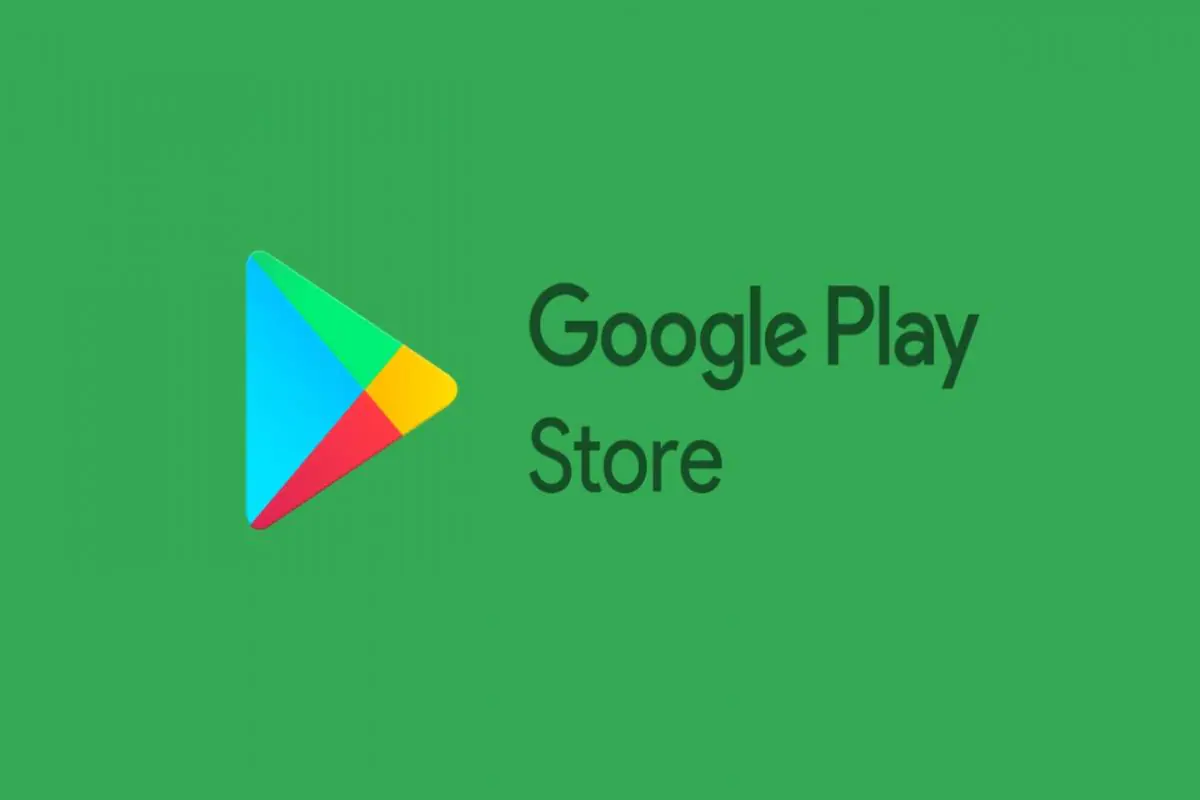

## **Importing Required packages**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##**Load the Dataset as Dataframe**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
play_store = pd.read_csv('/content/drive/MyDrive/Almabetter/ Capstone Projects-1/Play Store Data.csv')

In [ ]:
user_reviews = pd.read_csv('/content/drive/MyDrive/Almabetter/ Capstone Projects-1/User Reviews.csv')

##**Let's print the number of rows and column**

In [ ]:
play_store.shape

(10841, 13)

In [ ]:
user_reviews.shape

(64295, 5)

In [ ]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
user_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [ ]:
play_store.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
play_store.head() #for Loading first 5 rows of playstore dataframe

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
play_store.tail() #for Loading last 5 rows of playstore dataframe

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
play_store.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


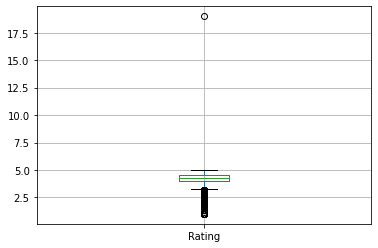

In [ ]:
play_store.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1af27890a0>]],
      dtype=object)

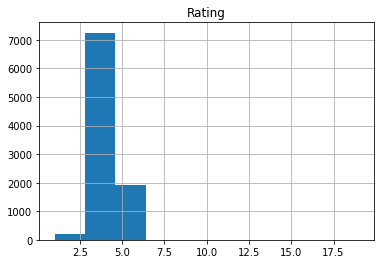

In [ ]:
play_store.hist()

##**Missing Value**

Count the number of missing values in the dataframe

In [ ]:
play_store.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
play_store.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

**Checking how many ratings are more than 5 i.e Outliers**

In [ ]:
play_store[play_store.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
play_store.drop([10472],inplace = True)

In [ ]:
play_store[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


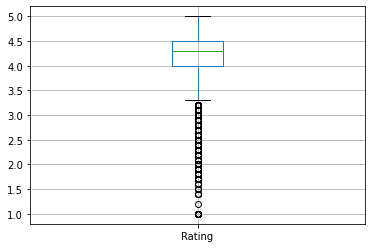

In [ ]:
play_store.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1af21cd580>]],
      dtype=object)

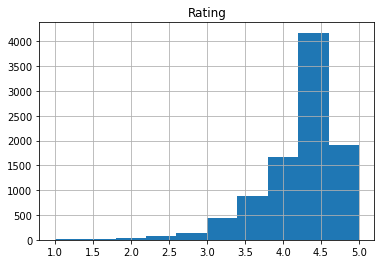

In [ ]:
play_store.hist()

##**Does the data frame contain any Nun value?**

In [ ]:
play_store.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
play_store.shape

(10840, 13)

In [ ]:
play_store.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

**Data Imputation and Data Manipulation**

Filling the Null values with the appropriate values using aggregate functions such as Mean,Median,Mode

In [ ]:
# Defining the function to fill the null values with the median.
def impute_median(series):
  return series.fillna(series.median())

In [ ]:
play_store.Rating = play_store['Rating'].transform(impute_median)

In [ ]:
# Count the number of values in each column
play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
# Mode of categorical values
print(play_store['Type'].mode())
print(play_store['Current Ver'].mode())
print(play_store['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [ ]:
# Filling the missing categorical values with Mode
play_store['Type'].fillna(str(play_store['Type'].mode().values[0]),inplace=True)
play_store['Current Ver'].fillna(str(play_store['Current Ver'].mode().values[0]),inplace=True)
play_store['Android Ver'].fillna(str(play_store['Android Ver'].mode().values[0]),inplace=True)

In [ ]:
# Counting the number of null values in each column
play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Converting Price,Ratings into numerical values
play_store['Price'] = play_store['Price'].apply(lambda x : str(x).replace('$','') if '$' in str(x) else str(x))
play_store['Price'] = play_store['Price'].apply(lambda x : float(x))

In [ ]:
play_store['Installs'] = play_store['Installs'].apply(lambda x : str(x).replace('+','') if '+' in str(x) else str(x))
play_store['Installs'] = play_store['Installs'].apply(lambda x : str(x).replace(',','') if ',' in str(x) else str(x))
play_store['Installs'] = play_store['Installs'].apply(lambda x : float(x))

In [ ]:
# Creating category for categorical data
grp = play_store.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
print(x)
print(y)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

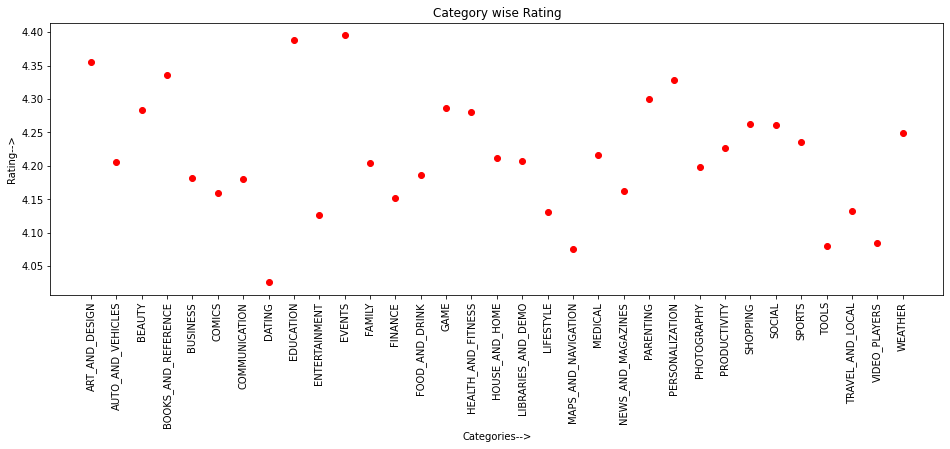

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro')
plt.xticks(rotation = 90)
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()

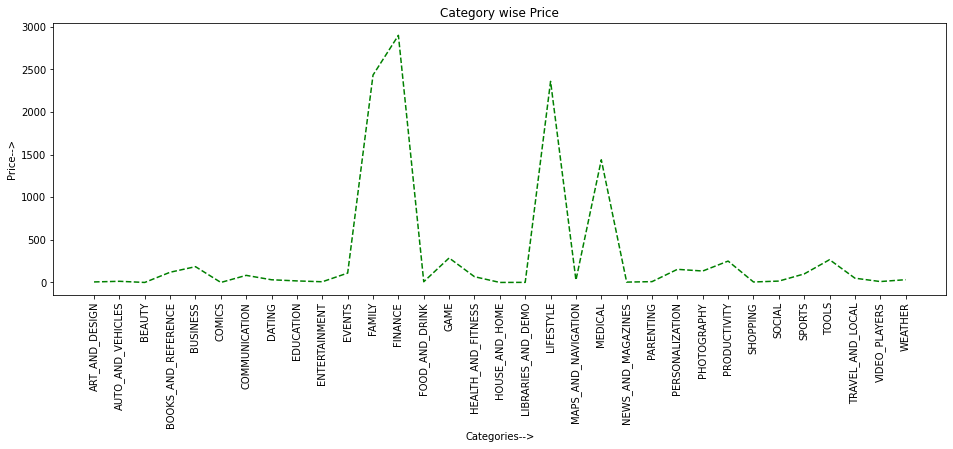

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--',color='g')
plt.xticks(rotation=90)
plt.title('Category wise Price')
plt.xlabel('Categories-->')
plt.ylabel('Price-->')
plt.show()

##**Category wise review**

**Data cleaning**

In [ ]:
play_store.loc[play_store['Category']=='1.9', 'Reviews']=0 #removing outliers

In [ ]:
play_store['Reviews']=play_store['Reviews'].astype('int') #changing datatype of Reviews

In [ ]:
category_wise_reviews=play_store.groupby('Category')['Reviews'].mean().sort_values(ascending=False)
print(category_wise_reviews)

Category
COMMUNICATION          2.107138e+06
SOCIAL                 2.105903e+06
GAME                   1.385859e+06
PHOTOGRAPHY            6.373631e+05
VIDEO_PLAYERS          6.307439e+05
SHOPPING               4.424662e+05
ENTERTAINMENT          3.971688e+05
TOOLS                  3.240629e+05
PRODUCTIVITY           2.691438e+05
EDUCATION              2.538191e+05
TRAVEL_AND_LOCAL       2.427051e+05
PERSONALIZATION        2.279238e+05
MAPS_AND_NAVIGATION    2.237902e+05
FAMILY                 2.080255e+05
NEWS_AND_MAGAZINES     1.922292e+05
SPORTS                 1.844536e+05
WEATHER                1.781065e+05
HEALTH_AND_FITNESS     1.111253e+05
BOOKS_AND_REFERENCE    9.506090e+04
FOOD_AND_DRINK         6.994748e+04
COMICS                 5.638793e+04
FINANCE                4.795281e+04
HOUSE_AND_HOME         4.518619e+04
LIFESTYLE              3.372457e+04
DATING                 3.115931e+04
BUSINESS               3.033598e+04
ART_AND_DESIGN         2.637600e+04
PARENTING          

**Ploting category wise review**

Text(0.5, 1.0, 'Category Wise Reviews')

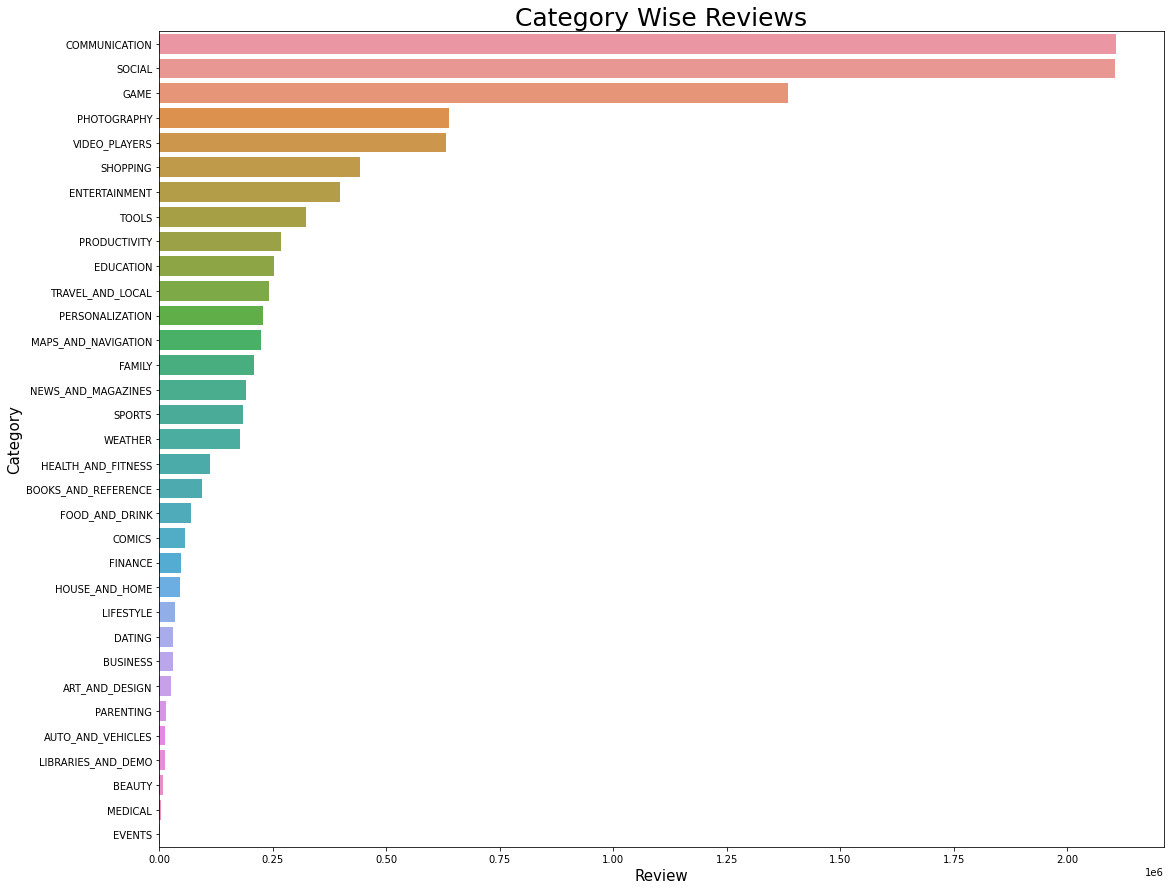

In [ ]:
plt.rcParams['figure.figsize']=(18,15)
sns.barplot(x=category_wise_reviews, y=category_wise_reviews.index, data=play_store)
plt.xlabel('Review',fontsize=15)
plt.ylabel('Category',fontsize=15)
plt.title('Category Wise Reviews',fontsize=25)

#**Type of apps with respect to Purchase**

There are two type of apps given wrt to purchase that is either free or paid. Let's check the percentage of apps is free or paid.

In [ ]:
play_store.loc[play_store['Type']=='0','Type']='Free' #replacing Type '0' with 'Free'
purchasability_wise_distribution=play_store['Type'].value_counts()

Ploting

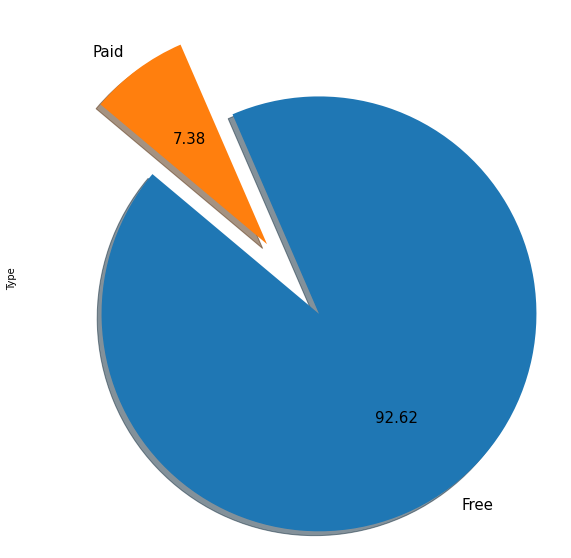

In [ ]:
'''from pygooglechart import PieChart3D

def python_pie3D() :
  # initialize chart object, 250 x 250 pixels
  f = PieChart3D(250, 250)'''
sizes = [215, 130, 245, 210]

def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) if pct > 5 else ''
explosion=(0.2,0.2) #look like break away piece
plt.rcParams['figure.figsize']=(15,10)
purchasability_wise_distribution.plot(kind='pie',explode=explosion,autopct=autopct,shadow=True,startangle=140,fontsize=15)

#**Category wise size**

Cleaning the data

In [ ]:
play_store['Size'] = play_store['Size'].apply(lambda x: x.strip('+')) #removing '+' symbol
play_store['Size'] = play_store['Size'].apply(lambda x: x.replace(',', '')) #removing ',' symbol to convert into integers
play_store['Size'] = play_store['Size'].str.replace("M","000") #replacing 'M'(millions) with '000'
play_store['Size'] = play_store['Size'].str.replace("k","") #putting all data of size in kilobyte
play_store['Size'] = play_store['Size'].str.replace("1000+","1000", regex=True) #removing '+' symbol 
play_store['Size'] = play_store['Size'].replace('Varies with device',np.nan) #replacing 'Vareis with device' with with np.nan for running the code
play_store['Size'] = play_store['Size'].astype(float) #changing data type of Size Coloumn

Average size of app in various category

In [ ]:
category_wise_avg_size =play_store.groupby('Category')['Size'].mean().reset_index().sort_values(by='Category',ascending='True') #grouping of category with respect to size 

In [ ]:
print(category_wise_avg_size)

               Category          Size
0        ART_AND_DESIGN   9325.483871
1     AUTO_AND_VEHICLES  17923.262667
2                BEAUTY  10939.029787
3   BOOKS_AND_REFERENCE  10217.842132
4              BUSINESS  11692.175000
5                COMICS  10669.994118
6         COMMUNICATION   9623.466038
7                DATING  14096.870755
8             EDUCATION  19137.366667
9         ENTERTAINMENT  20823.253333
10               EVENTS  11587.185965
11               FAMILY  26486.757697
12              FINANCE  15517.836156
13       FOOD_AND_DRINK  20841.165000
14                 GAME  43019.706601
15   HEALTH_AND_FITNESS  19904.109848
16       HOUSE_AND_HOME  12762.733824
17   LIBRARIES_AND_DEMO   9403.090244
18            LIFESTYLE  11879.830725
19  MAPS_AND_NAVIGATION  13850.562963
20              MEDICAL  17593.417512
21   NEWS_AND_MAGAZINES  10055.031481
22            PARENTING  20113.512963
23      PERSONALIZATION   8552.320282
24          PHOTOGRAPHY  14734.690551
25         P

Ploting category wise size

Text(0.5, 1.0, 'Categories Wise Size')

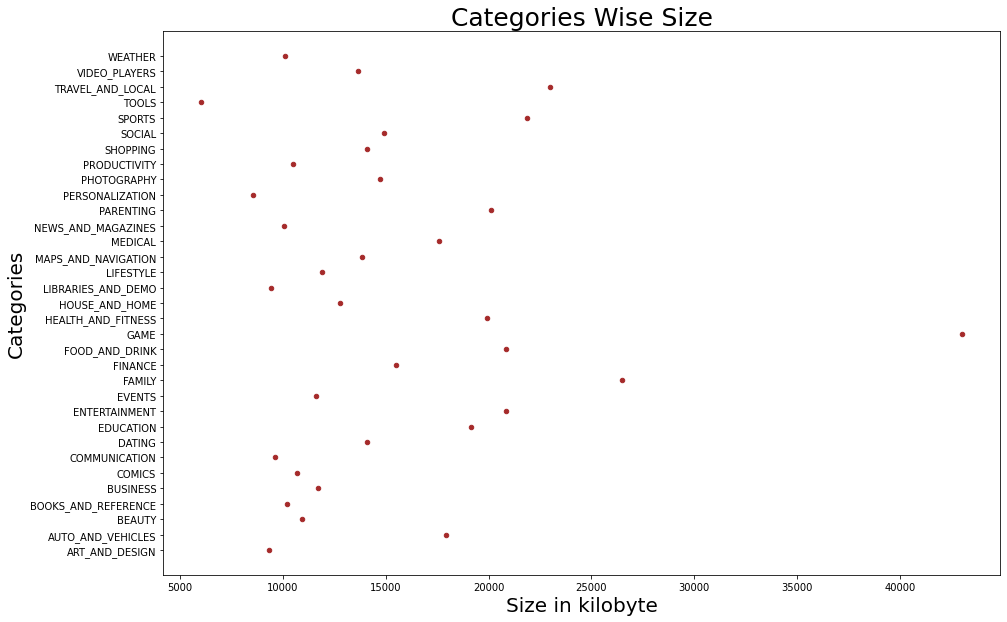

In [ ]:
category_wise_avg_size.plot(y='Category',x='Size', kind='scatter',color='brown')
plt.xlabel('Size in kilobyte',size=20)
plt.ylabel('Categories',size=20)
plt.title('Categories Wise Size',fontsize=25)

#**Distribution of content rating with respect to age**

In [ ]:
from pandas._libs.hashtable import value_count
distribution_in_content=play_store['Content Rating'].value_counts()

Ploting the count of content rating with respect to Age

Text(0.5, 1.0, 'Age vs Content Rating')

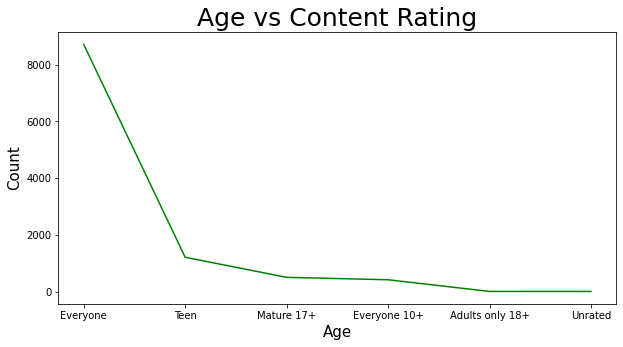

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
distribution_in_content.plot(kind='line',color='g') 
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Age vs Content Rating',fontsize=25)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


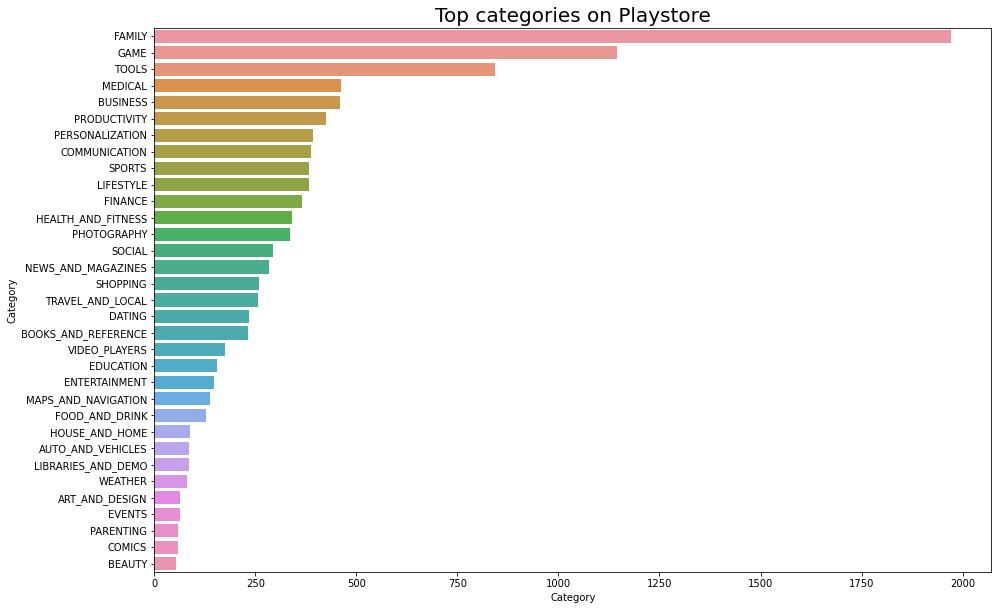

In [ ]:
plt.figure(figsize=(15,10))

y = play_store['Category'].value_counts().index
x = play_store['Category'].value_counts()
plt.xlabel("Count")
plt.ylabel("Category")
graph = sns.barplot(x, y)
graph.set_title("Top categories on Playstore", fontsize = 20);

#**Conclusion**



we are moving toward the concluding our analysis.


1-Family and Game related Apps are most available category.

2-All Category of Apps got more or less same rating in between 4 & 5.

3-By analysing Rating Density,we come to know that most number of user given rating between 4 & 5.

4-Communication and Social category of Apps got most number of reviews.
 Might be duty to the sensitivity of privacy which user see befor using these Apps.

5-Nearly 93% of Apps are free thus make Android Market more popular store than others.

6-By looking at Category Wise Size,the most number of Category have average size in between 10MB and 20 MB.

7-Most of the Apps are suitable for Everyone,as we increase the suitable age less and less number of Apps are targeted.

Price relation with every feature is near zero because for most of the Apps price are free.


Quiet long!but this analysis gave information not only about Apps but also the interest of the users as well as population which ll later help developer to make more user friendly Apps and can be utilized by everyone. 
 
